<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/SimplConv1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Problème 1] Création d'une classe de couche convolutionnelle unidimensionnelle qui limite le nombre de canaux à un

In [ ]:
import numpy as np;
from scipy.sparse import dia_matrix
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:

class SimpleConv1d:
    def __init__(self, weight, baias):
        self.optimizer = None

        self.W = weight
        self.B = baias
        self.dW = None
        self.dB = None
        self.idx =None
        self.X = None
        pass

    def forward(self, X):
        self.X = X
        idx1 = np.arange(self.W.shape[0])
        idx2 = np.arange(self.W.shape[0]-1 ).reshape(-1, 1)
        self.idx = idx1 + idx2
        A = np.sum(X[self.idx] * self.W.T,axis=1) + self.B
        return A
    def backward(self,X,dA):
        dB = np.sum(dA,axis=0)
        dW = np.sum(dA[:,np.newaxis] * X[self.idx],axis=0)
        da = dA.reshape(-1,1)
        data= np.repeat(da,X.shape[0],axis=1)
        offsets= np.arange(self.output(data))
        d = dia_matrix((data,offsets),shape=(w.shape[0],x.shape[0])).toarray()
        dx = np.sum(d * w[:,np.newaxis],axis=0)
        
        return dx
    def output(self,X):
        n_in = X.shape[1]
        p = 0
        f = self.W.shape[0]
        s = 1 
        n_out = ((n_in + 2*p - f)/s)+1
        return n_out

#[Problème 2] Calcul de la taille de sortie après convolution unidimensionnelle

In [ ]:
def output(X,p,f,s):
    n_in = X.shape[0]
    n_out = ((n_in + 2*p - f)/s)+1
    return n_out

#[Problème 3] Expérience d'une couche convolutionnelle unidimensionnelle avec un petit réseau

In [ ]:
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])
x.shape,w.shape,b.shape

((4,), (3,), (1,))

In [ ]:
sc1 = SimpleConv1d(w,b)
sc1.forward(x)

array([35, 50])

In [ ]:
delta_a =np.array([10, 20])
delta_a.shape
delta_b = np.array([30])
delta_w = np.array([50, 80, 110])
delta_x = np.array([30, 110, 170, 140])

In [ ]:
sc1 = SimpleConv1d(delta_w,delta_b)
sc1.backward(x,delta_a)

array([ 30, 110, 170, 140])

In [ ]:
x = np.array([1, 2, 3, 4])
w = np.array([3, 5, 7])

a = np.empty((2, 3))

indexes0 = np.array([0, 1, 2])
indexes1 = np.array([1, 2, 3])

a[0] = x[indexes0]*w # x[indexes0]は([1, 2, 3])である
a[1] = x[indexes1]*w # x[indexes1]は([2, 3, 4])である

a = a.sum(axis=1)
a

array([34., 49.])

#[Problème 4] Création d'une classe de couche convolutionnelle unidimensionnelle qui ne limite pas le nombre de canaux

In [ ]:
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # 
w = np.ones((3, 2, 3)) # 
b = np.array([1, 2, 3])

In [ ]:
def output2(X,p,f,s):
    n_in = X.shape[1]
    p = p #
    f = f #
    s = s #
    n_out = ((n_in + 2*p - f)/s)+1
    return n_out

In [ ]:
a = np.array([[16, 22], [17, 23], [18, 24]])
o = int(output2(x,0,w.shape[-1],1))
print(o)

nin, i = x.shape
print(nin,i)
oc, c, f = w.shape
print(oc,c,f)

#c * f 
idx_arr = np.arange(c*f).reshape(c,f)
idx_arr

2
2 4
3 2 3


array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
idx1 = np.arange(w.shape[-1])

idx2 = np.arange(w.shape[-1]-1 ).reshape(-1, 1)

idx = idx1 + idx2

print(x[:,idx].shape)
a1 = x[:,idx]
a2 = w
print(a1)
a= np.zeros((f,o))
for i in range(f):
    for j in range(o):
        x_in = a1[j]
        print(x_in.shape)
        a[i][j] = np.sum(x_in @ w[i][j])
        print('a',a.shape)
    print(b[i].shape)
    a[i] += a[i] + b[i]
    print(a)

(2, 2, 3)
[[[1 2 3]
  [2 3 4]]

 [[2 3 4]
  [3 4 5]]]
(2, 3)
a (3, 2)
(2, 3)
a (3, 2)
()
[[31. 43.]
 [ 0.  0.]
 [ 0.  0.]]
(2, 3)
a (3, 2)
(2, 3)
a (3, 2)
()
[[31. 43.]
 [32. 44.]
 [ 0.  0.]]
(2, 3)
a (3, 2)
(2, 3)
a (3, 2)
()
[[31. 43.]
 [32. 44.]
 [33. 45.]]


In [ ]:
def compute_output_size(n_in, P, F, S):
    return int(1 + (n_in + 2*P - F) / S)

In [ ]:
class FC:
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

    
    def forward(self, Z1):
        self.Z = Z1.copy()
        Z2 = np.dot(Z1, self.W) + self.B
        
        return Z2
    
    
    def backward(self, dA):
        self.dB = dA 
        self.dW = np.dot(self.Z.T, dA) 
        dZ = np.dot(dA, self.W.T) 
        
        self = self.optimizer.update(self)
        
        return dZ

In [ ]:
class GetMiniBatch:
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

In [ ]:
class SimpleInitializer:
    def __init__(self, sigma=0.01):
        self.sigma = sigma

    def W(self, n_nodes1, n_nodes2):
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        return self.sigma * np.random.randn(n_nodes2)

In [ ]:
class Flat():
    def __init__(self):
        self.X_shape = None
    
    def forward(self, X):
        X_1d = X.reshape(X.shape[0], -1)
        
        self.X_shape = X.shape
        
        return X_1d

    def backward(self, X):
        X = X.reshape(self.X_shape)
        
        return X

In [ ]:
class Tanh:
    def __init__(self):
        self.Z = None
    
    def forward(self, A):
        self.Z =  np.tanh(A)
        
        return  self.Z
    
    def backward(self, dZ):
        dA = dZ * (1 - self.Z**2)
        
        return dA

In [ ]:
class XavierInitializer:
    def __init__(self, n_nodes1):
        self.sigma = 1.0 / n_nodes1**(1/2)

    def W(self, n_nodes1, n_nodes2):
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        return self.sigma * np.random.randn(n_nodes2)

In [ ]:
class Sigmoid:
    def __init__(self):
        self.Z = None 
    def forward(self, A):
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z
    def backward(self, dZ):
        dA = dZ * (1 - self.Z) * self.Z
        return dA

In [ ]:
class HeInitializer:
    def __init__(self, n_nodes1):
        self.sigma = (2.0 / n_nodes1)**(1/2)

    def W(self, n_nodes1, n_nodes2):
        return self.sigma * np.random.randn(n_nodes1, n_nodes2)

    def B(self, n_nodes2):
        return self.sigma * np.random.randn(n_nodes2)

In [ ]:
class AdaGrad:
    def __init__(self, lr):
        self.lr = lr 
        self.H_W= None 
        self.H_B = None

    def update(self, layer):
        if self.H_W is None:
            self.H_W = np.zeros(layer.W.shape)
        if self.H_B is None:
            self.H_B = np.zeros(layer.B.shape)
        
        self.H_W += (layer.dW / layer.dB.shape[0]) ** 2 
        self.H_B += (layer.dB.mean(axis=0)) **2
        layer.W -= self.alpha / np.sqrt(self.H_W + 1e-7) * layer.dW / layer.dB.shape[0] 
        layer.B -= self.alpha / np.sqrt(self.H_B + 1e-7) * layer.dB.mean(axis=0) 
        
        return layer

In [ ]:
class ReLU:
    def forward(self, A):
        return np.maximum(A, 0)
    
    def backward(self, dZ, Z):
        return dZ * (Z > 0)

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, layer):
        layer.W -= self.lr * layer.dW
#        layer.B -= self.lr * layer.dB
        return layer

In [ ]:
class Softmax:
    def forward(self, A):
        return np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
    
    def backward(self, Z, y):
        return (Z - y) / y.shape[0], -np.sum((y * np.log(Z + 1e-7))) / y.shape[0]

In [ ]:
class Conv1d:
    def __init__(self, F, ch_in, ch_out, initializer, optimizer):
        self.F = F
        self.ch_in = ch_in
        self.ch_out = ch_out
        self.optimizer = optimizer
        self.W = np.empty((ch_out, ch_in, F))
        for ch in np.arange(0, ch_out):
            self.W[ch] = initializer.W(ch_in, F)
        self.B = initializer.B(ch_out)

    def forward(self, X):
        self.X = X
        self.n_out = compute_output_size(self.X.shape[1], 0, self.F, 1)
        A = np.empty((self.ch_out, self.n_out))
        for ch in np.arange(0, self.ch_out):
            for i in np.arange(0, self.n_out):
                A[ch, i] = np.sum(X[:, i:i+self.F] * self.W[ch]) + self.B[ch]
        return A

    def backward(self, dA):
        #update dW
        self.dW = np.empty((self.ch_out, self.ch_in, self.F))
        for c_out in np.arange(0, self.ch_out):
            for c_in in np.arange(0, self.ch_in):
                for s in np.arange(0, self.F):
                    self.dW[c_out, c_in, s] = np.sum(dA[c_out] * self.X[c_in, s:s+self.n_out])
        #update dB
        self.dB = np.sum(dA, axis=1)
        #update dZ
        self.dZ = np.empty((self.ch_in, self.X.shape[1]))
        for c_in in np.arange(0, self.ch_in):
            for j in np.arange(0, self.X.shape[1]):
                total = 0.0
                for c_out in np.arange(0, self.ch_out):
                    for s in np.arange(0, self.F):
                        if (j - s >= 0 and j - s < self.n_out):
                            total += dA[c_out, j - s] * self.W[c_out, c_in, s]
                self.dZ[c_in, j] = total
        # update new W, B
        self = self.optimizer.update(self)
        return self.dZ

In [ ]:
class SimpleInitializer:
    def __init__(self, sigma):
        self.sigma = sigma 
        

    def W(self, n_nodes1=None, n_nodes2=None,filter_num=None, C=None, filter_size=None):

        if filter_num is not None and C is not None and filter_size is not None:
            W =  self.sigma * np.random.randn(filter_num, C, filter_size) 
        if n_nodes1 is not None and n_nodes2 is not None:
            W =  self.sigma * np.random.randn(n_nodes1, n_nodes2) 
        return W
    
    
    def B(self, n_nodes2):
        B = np.zeros(n_nodes2) 
        return B

In [ ]:
class Scratch1dCNNClassifier:
    def __init__(self,
                conv_filter_size=[3],
                hidden_layers=[400,200],
                hidden_activations=['tanh', 'tanh'],
                hidden_initializers=['gaussian', 'gaussian'],
                sigma=0.01,
                optimizer='sgd',
                layer_type=None,
                batch_size=20,
                epochs=10,
                lr=0.01,
                seed=0,
                verbose=False
                ):
        self.F = conv_filter_size
        self.hidden_layers = hidden_layers
        self.activations_name = hidden_activations.copy()
        self.activations_name.insert(0, None)
        self.activations_name.append('softmax')
        self.initializers = hidden_initializers.copy()
        self.initializers.insert(0, None)
        self.initializers.append('gaussian')
        self.sigma = sigma
        self.optimizer = optimizer
        self.layer_type = layer_type
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr
        self.seed = seed
        self.verbose = verbose

    def _initialize_neural_network(self):
        #initialize conv layers
        self.conv = np.full(len(self.F) + 1, None)
        self.conv_activations = np.full(len(self.F) + 1, None)
        for i in np.arange(1, len(self.F) + 1):
            self.conv[i] = Conv1d(self.F[i - 1], 1, 1, HeInitializer(1), SGD(self.lr))
            self.conv_activations[i] = ReLU()
        #choose activations
        self.activations = np.full(len(self.n_nodes), None) #activations[0] unused
        for i in np.arange(1, len(self.n_nodes)):
            if (self.activations_name[i] == 'tanh'):
                self.activations[i] = Tanh()
            elif (self.activations_name[i] == 'sigmoid'):
                self.activations[i] = Sigmoid()
            elif (self.activations_name[i] == 'relu'):
                self.activations[i] = ReLU()
            elif (self.activations_name[i] == 'softmax'):
                self.activations[i] = Softmax()
        #choose initializer, optimizer and build neural network
        self.FC = np.full(len(self.n_nodes), None) #FC[0] unused
        for i in np.arange(1, len(self.n_nodes)):
            if (self.optimizer == 'sgd'):
                if (self.initializers[i] == 'gaussian'):
                    self.FC[i] = FC(self.n_nodes[i - 1], self.n_nodes[i], SimpleInitializer(self.sigma), SGD(self.lr))
                elif (self.initializers[i] == 'xavier'):
                    self.FC[i] = FC(self.n_nodes[i - 1], self.n_nodes[i], XavierInitializer(self.n_nodes[i - 1]), SGD(self.lr))
                elif (self.initializers[i] == 'he'):   
                    self.FC[i] = FC(self.n_nodes[i - 1], self.n_nodes[i], HeInitializer(self.n_nodes[i - 1]), SGD(self.lr))
            elif (self.optimizer == 'adagrad'):
                if (self.initializers[i] == 'gaussian'):
                    self.FC[i] = FC(self.n_nodes[i - 1], self.n_nodes[i], SimpleInitializer(self.sigma), AdaGrad(self.lr, (self.n_nodes[i - 1], self.n_nodes[i])))
                elif (self.initializers[i] == 'xavier'):
                    self.FC[i] = FC(self.n_nodes[i - 1], self.n_nodes[i], XavierInitializer(self.n_nodes[i - 1]), AdaGrad(self.lr, (self.n_nodes[i - 1], self.n_nodes[i])))
                elif (self.initializers[i] == 'he'):   
                    self.FC[i] = FC(self.n_nodes[i - 1], self.n_nodes[i], HeInitializer(self.n_nodes[i - 1]), AdaGrad(self.lr, (self.n_nodes[i - 1], self.n_nodes[i])))

    def _forward(self, X):
        #conv
        A_conv = np.full(len(self.F) + 1, None)
        Z_conv = np.full(len(self.F) + 1, None)
        Z_conv[0] = X
        for i in np.arange(1, len(self.F) + 1):
            A_conv[i] = self.conv[i].forward(Z_conv[i - 1])
            Z_conv[i] = self.conv_activations[i].forward(A_conv[i])
        #FC
        A = np.full(len(self.n_nodes), None) #A[0] unused
        Z = np.full(len(self.n_nodes), None)
        Z[0] = Z_conv[-1]
        for i in np.arange(1, len(self.n_nodes)):
            A[i] = self.FC[i].forward(Z[i - 1])
            Z[i] = self.activations[i].forward(A[i])
        return Z, Z_conv

    def _backward(self, y, Z, Z_conv):
        #FC
        dA = np.full(len(self.n_nodes), None) #A[0] unused
        dZ = np.full(len(self.n_nodes), None) #Z[-1] unused
        CEE = None
        for i in np.arange(len(self.n_nodes) - 1, 0, -1):
            if (self.activations_name[i] == 'softmax'):
                dA[i], CEE = self.activations[i].backward(Z[i], y)
            else:
                dA[i] = self.activations[i].backward(dZ[i], Z[i])
            dZ[i - 1] = self.FC[i].backward(dA[i])
        #conv
        dA_conv = np.full(len(self.F) + 1, None)
        dZ_conv = np.full(len(self.F) + 1, None)
        dZ_conv[-1] = dZ[0]
        for i in np.arange(len(self.F), 0, -1):
            dA_conv[i] = self.conv_activations[i].backward(dZ_conv[i], Z_conv[i])
            dZ_conv[i - 1] = self.conv[i].backward(dA_conv[i])
        return CEE

    def _compute_CEE(self, y, Z):
        return -np.sum((y * np.log(Z + 1e-7))) / y.shape[0]

    def _optimize(self, X, y, X_val=None, y_val=None):
        self.CEE_list = []
        self.CEE_list_val = []
        get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size, seed=self.seed)
        for _ in np.arange(0, self.epochs):
            for mini_X, mini_y in get_mini_batch:
                Z, Z_conv = self._forward(mini_X)
                CEE = self._backward(mini_y, Z, Z_conv)
                self.CEE_list.append(CEE)
            if (X_val is not None and y_val is not None):
                Z, _ = self._forward(X_val)
                self.CEE_list_val.append(self._compute_CEE(y_val, Z[-1]))

    def fit(self, X, y, X_val=None, y_val=None):

        self.n_output = y.shape[1]
        self.n_features = X.shape[1]
        self.n_nodes = self.hidden_layers.copy()
        n_out = len(X[0])
        for i in np.arange(0, len(self.F)):
            n_out = compute_output_size(n_out, 0, self.F[i], 1)
        self.n_nodes.insert(0, n_out)
        self.n_nodes.append(self.n_output)
        self._initialize_neural_network()
        self._optimize(X, y, X_val, y_val)

    def predict(self, X):

        Z_ret = []
        for x in X:
            Z_pred, _ = self._forward(np.array([x]))
            Z_ret.append(np.argmax(Z_pred[-1]))
        return np.array(Z_ret)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)


X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


1.0
0.0
(48000, 784)
(12000, 784)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
def plot_CEE(CEE_list=None, CEE_list_val=None, epochs=None):
    """plot final CEE for every epochs"""
    if (CEE_list is not None):
        plt.plot(np.arange(1, epochs + 1), CEE_list[::int(len(CEE_list)/epochs)], label="train", marker='o')
    if (CEE_list_val is not None):
        plt.plot(np.arange(1, epochs + 1), CEE_list_val, label="val", marker='o')
    plt.legend()
    plt.xlabel("iter")
    plt.ylabel("CEE")
    plt.title("CEE graph")
    plt.grid()
    plt.show()
def draw_fault(y_pred, y_val):
    """
    Display word classification results side by side. The display above the image is "estimated result / correct answer".
    Parameters:
    ----------
    y_pred : Estimated ndarray (n_samples,)
    y_val : Correct label of verification data (n_samples,)
    X_val : Verification data features (n_samples, n_features)
    """
    num = 36 # How many to display

    true_false = y_pred==y_val
    false_list = np.where(true_false==False)[0].astype(np.int)
    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(6, 6))
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')



def save_model(model_name, model):
    np.savez(model_name + '.npz', model)



def handler(model=None, X_train=None, y_train=None, X_val=None, y_val=None, epochs=None, save=False, file_name=None):
  model.fit(X_train, y_train, X_val, y_val)
  y_pred = model.predict(X_val)
  unique_elements, counts_elements = np.unique(y_pred - np.argmax(y_val, axis=1), return_counts=True)
  print("number of correct cases: {}/{}".format(int(counts_elements[unique_elements == 0]), y_pred.shape[0]))
  print("Accuracy: {}".format(accuracy_score(np.argmax(y_val, axis=1), y_pred)))
  plot_CEE(CEE_list=model.CEE_list, CEE_list_val=model.CEE_list_val, epochs=epochs)
  draw_fault(y_pred, np.argmax(y_val, axis=1))
  if (save == True):
      save_model('file_name', model)



In [ ]:
epochs = 1
batch_size = 1
cnn_1 = Scratch1dCNNClassifier(
                conv_filter_size=[20, 10],
                hidden_layers=[400,200],
                hidden_activations=['relu', 'relu'],
                hidden_initializers=['he', 'he'],
                sigma=0.01,
                optimizer='sgd',
                layer_type=None,
                batch_size=batch_size,
                epochs=epochs,
                lr=0.05,
                seed=69,
                verbose=False       
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


number of correct cases: 975/9600
Accuracy: 0.1015625


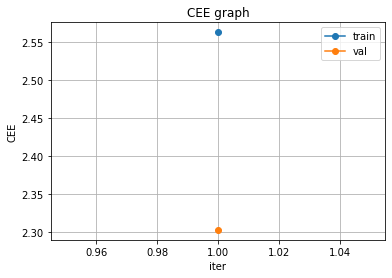

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


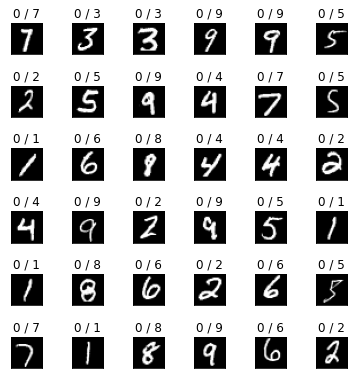

In [ ]:

handler(model=cnn_1,X_train= X_train,y_train= y_train,X_val= X_val, y_val=y_val, epochs=1)